### Customer Segmentation with K-Means Clustering
Customer segmentation will be applied to an e-commerce customer database using K-means clustering from scikit-learn.

This project is taking the case study with the following motive:

Can the customer database be grouped to develop customized relationships?

To answer this question 3 features will be created and used:

- products ordered
- average return rate
- total spending

Dataset represents real customers & orders data between November 2018 - April 2019 and it is pseudonymized for confidentiality.

In [1]:
# data wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

# for data preprocessing and clustering
from sklearn.cluster import KMeans

%matplotlib inline
# to include graphs inline within the frontends next to code

In [2]:
# load data into a dataframe
customers_orders = pd.read_csv("Orders - Analysis Task.csv")

# first rows of the dataset
customers_orders.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657.0,1312378.0,8.329070e+13,04-12-2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686.0,3715657.0,3.625380e+13,01-04-2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862.0,9533448.0,7.309460e+13,05-11-2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868.0,4121004.0,5.361660e+13,19-02-2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868.0,4121004.0,2.926320e+13,19-02-2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


In [3]:
# first glance of customers_orders data
customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           70052 non-null  object 
 1   product_type            70052 non-null  object 
 2   variant_title           70052 non-null  object 
 3   variant_sku             70052 non-null  object 
 4   variant_id              70052 non-null  float64
 5   customer_id             70052 non-null  float64
 6   order_id                70052 non-null  float64
 7   day                     70052 non-null  object 
 8   net_quantity            70052 non-null  int64  
 9   gross_sales             70052 non-null  float64
 10  discounts               70052 non-null  float64
 11  returns                 70052 non-null  float64
 12  net_sales               70052 non-null  float64
 13  taxes                   70052 non-null  float64
 14  total_sales             70052 non-null

In [4]:
# descriptive statistics of the non-object columns
customers_orders.describe()

,variant_id,customer_id,order_id,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
count,7.005200e+04,7.005200e+04,7.005200e+04,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000
mean,2.442318e+11,6.013091e+11,5.506075e+13,0.701179,61.776302,-4.949904,-10.246051,46.580348,9.123636,55.703982,-0.156098,0.857277
std,4.255077e+12,6.223201e+12,2.587640e+13,0.739497,31.800689,7.769972,25.154677,51.802690,10.305236,61.920557,0.369190,0.380820
min,1.001447e+07,1.000661e+06,1.000660e+13,-3.000000,0.000000,-200.000000,-237.500000,-237.500000,-47.500000,-285.000000,-3.000000,0.000000
25%,2.692223e+07,3.295695e+06,3.270320e+13,1.000000,51.670000,-8.340000,0.000000,47.080000,8.375000,56.227500,0.000000,1.000000
50%,4.494514e+07,5.566107e+06,5.522210e+13,1.000000,74.170000,0.000000,0.000000,63.330000,12.660000,76.000000,0.000000,1.000000
75%,7.743106e+07,7.815352e+06,7.736880e+13,1.000000,79.170000,0.000000,0.000000,74.170000,14.840000,89.000000,0.000000,1.000000
max,8.422210e+13,9.977410e+13,9.999550e+13,6.000000,445.000000,0.000000,0.000000,445.000000,63.340000,445.000000,0.000000,6.000000


In [5]:
# There were significant number of rows whose ordered_item_quantity is 0 and net_quantity is less than 0, which means they are not ordered/sold at all; 
# but the fact that they have returns requires investigation.

print("Number of rows that net quantity is negative:", 
      customers_orders[customers_orders.net_quantity < 0].shape[0])

Number of rows that net quantity is negative: 10715


In [6]:
# exclude not sold/ordered SKUs from the dataset
customers_orders = customers_orders[customers_orders["ordered_item_quantity"] > 0]

In [7]:
# Create functions to identify customers who order multiple products

def encode_column(column):
    if column > 0:
        return 1
    if column <= 0:
        return 0

def aggregate_by_ordered_quantity(dataframe, column_list):
    '''this function:
    1. aggregates a given dataframe by column list, 
    as a result creates an aggregated dataframe by counting the ordered item quantities

    2. adds number_of_X ordered where X is the second element in the column_list 
    to the aggregated dataframe by encoding ordered items into 1

    3. creates final dataframe containing information about 
    how many of X are ordered, based on the first element passed in the column list'''

    aggregated_dataframe = (dataframe
                            .groupby(column_list)
                            .ordered_item_quantity.count()
                            .reset_index())

    aggregated_dataframe["products_ordered"] = (aggregated_dataframe
                                                .ordered_item_quantity
                                                .apply(encode_column))

    final_dataframe = (aggregated_dataframe
                       .groupby(column_list[0])
                       .products_ordered.sum() # aligned with the added column name
                       .reset_index())

    return final_dataframe

In [8]:
# apply functions to customers_orders
customers = aggregate_by_ordered_quantity(customers_orders, ["customer_id", "product_type"])
customers

,customer_id,products_ordered
0,1.000661e+06,1
1,1.001914e+06,1
2,1.002167e+06,3
3,1.002387e+06,1
4,1.002419e+06,2
...,...,...
24869,9.780500e+13,2
24870,9.885470e+13,2
24871,9.897420e+13,1
24872,9.926270e+13,2


In [9]:
# Average Return Rate
# It is the ratio of returned item quantity and ordered item quantity. This ratio is first calculated per order and then averaged for all orders of a customer.

# aggregate data per customer_id and order_id, 
# to see ordered item sum and returned item sum
ordered_sum_by_customer_order = (customers_orders
                                 .groupby(["customer_id", "order_id"])
                                 .ordered_item_quantity.sum()
                                 .reset_index())

returned_sum_by_customer_order = (customers_orders
                                  .groupby(["customer_id", "order_id"])
                                  .returned_item_quantity.sum()
                                  .reset_index())

# merge two dataframes to be able to calculate unit return rate
ordered_returned_sums = pd.merge(ordered_sum_by_customer_order, returned_sum_by_customer_order)
ordered_returned_sums

,customer_id,order_id,ordered_item_quantity,returned_item_quantity
0,1.000661e+06,9.912000e+13,3,0
1,1.001914e+06,7.975860e+13,1,0
2,1.002167e+06,3.815610e+13,1,0
3,1.002167e+06,5.744010e+13,1,0
4,1.002167e+06,5.882550e+13,1,0
...,...,...,...,...
42131,9.885470e+13,5.713880e+13,1,0
42132,9.897420e+13,4.506680e+13,1,0
42133,9.926270e+13,8.817390e+13,2,0
42134,9.926270e+13,9.979860e+13,1,0


In [10]:
# calculate unit return rate per order and customer
ordered_returned_sums["average_return_rate"] = (-1 * 
                                             ordered_returned_sums["returned_item_quantity"] /
                                             ordered_returned_sums["ordered_item_quantity"])
ordered_returned_sums.head()

,customer_id,order_id,ordered_item_quantity,returned_item_quantity,average_return_rate
0,1000661.0,9.912000e+13,3,0,0.0
1,1001914.0,7.975860e+13,1,0,0.0
2,1002167.0,3.815610e+13,1,0,0.0
3,1002167.0,5.744010e+13,1,0,0.0
4,1002167.0,5.882550e+13,1,0,0.0


In [11]:
# take average of the unit return rate for all orders of a customer
customer_return_rate = (ordered_returned_sums
                        .groupby("customer_id")
                        .average_return_rate
                        .mean()
                        .reset_index())
return_rates = pd.DataFrame(customer_return_rate["average_return_rate"]
                            .value_counts()
                            .reset_index())

return_rates.rename(columns=
                    {"index": "average return rate",
                     "average_return_rate": "count of unit return rate"},
                    inplace=True)

return_rates.sort_values(by="average return rate")

,average return rate,count of unit return rate
0,0.000000,24823
8,0.013889,1
9,0.066667,1
11,0.083333,1
10,0.125000,1
6,0.166667,2
5,0.200000,2
4,0.250000,5
2,0.333333,13
12,0.400000,1


In [12]:
# add average_return_rate to customers dataframe
customers = pd.merge(customers,
                     customer_return_rate,
                     on = "customer_id")

In [13]:
# Total spending
# Total spending is the aggregated sum of total sales value which is the amount after the taxes and returns.

# aggreagate total sales per customer id
customer_total_spending = (customers_orders
                           .groupby("customer_id")
                           .total_sales
                           .sum()
                           .reset_index())

customer_total_spending.rename(columns = {"total_sales" : "total_spending"},
                               inplace = True)

In [14]:
# Create features data frame
# add total sales to customers dataframe
customers = customers.merge(customer_total_spending, 
                            on="customer_id")
print("The number of customers from the existing customer base:", customers.shape[0])

# The number of customers from the existing customer base: 24874
# drop id column since it is not a feature
customers.drop(columns="customer_id",
               inplace=True)
customers.head()

The number of customers from the existing customer base: 24874


,products_ordered,average_return_rate,total_spending
0,1,0.0,260.0
1,1,0.0,79.2
2,3,0.0,234.2
3,1,0.0,89.0
4,2,0.0,103.0


In [15]:
# Scale Features: Log Transformation
def apply_log1p_transformation(dataframe, column):
    '''This function takes a dataframe and a column in the string format
    then applies numpy log1p transformation to the column
    as a result returns log1p applied pandas series'''
    
    dataframe["log_" + column] = np.log1p(dataframe[column])
    return dataframe["log_" + column]

In [16]:
apply_log1p_transformation(customers, "products_ordered")
apply_log1p_transformation(customers, "average_return_rate")
apply_log1p_transformation(customers, "total_spending")

0        5.564520
1        4.384524
2        5.460436
3        4.499810
4        4.644391
           ...   
24869    5.560682
24870    5.495117
24871    4.499810
24872    5.590987
24873    4.174387
Name: log_total_spending, Length: 24874, dtype: float64

In [17]:
customers.head()

,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending
0,1,0.0,260.0,0.693147,0.0,5.564520
1,1,0.0,79.2,0.693147,0.0,4.384524
2,3,0.0,234.2,1.386294,0.0,5.460436
3,1,0.0,89.0,0.693147,0.0,4.499810
4,2,0.0,103.0,1.098612,0.0,4.644391


In [18]:
# features we are going to use as an input to the model
customers.iloc[:,3:]

,log_products_ordered,log_average_return_rate,log_total_spending
0,0.693147,0.0,5.564520
1,0.693147,0.0,4.384524
2,1.386294,0.0,5.460436
3,0.693147,0.0,4.499810
4,1.098612,0.0,4.644391
...,...,...,...
24869,1.098612,0.0,5.560682
24870,1.098612,0.0,5.495117
24871,0.693147,0.0,4.499810
24872,1.098612,0.0,5.590987


In [19]:
# Create K-means model
# create initial K-means model
kmeans_model = KMeans(init='k-means++', 
                      max_iter=500, 
                      random_state=42)
kmeans_model.fit(customers.iloc[:,3:])

# print the sum of distances from all examples to the center of the cluster
print("within-cluster sum-of-squares (inertia) of the model is:", kmeans_model.inertia_)

within-cluster sum-of-squares (inertia) of the model is: 1066.6314745569075


In [20]:
# Hyperparameter tuning: Find optimal number of clusters
def make_list_of_K(K, dataframe):
    '''inputs: K as integer and dataframe
    apply k-means clustering to dataframe
    and make a list of inertia values against 1 to K (inclusive)
    return the inertia values list
    '''
    
    cluster_values = list(range(1, K+1))
    inertia_values=[]
    
    for c in cluster_values:
        model = KMeans(n_clusters = c, 
                       init='k-means++', 
                       max_iter=500, 
                       random_state=42)
        model.fit(dataframe)
        inertia_values.append(model.inertia_)
    
    return inertia_values

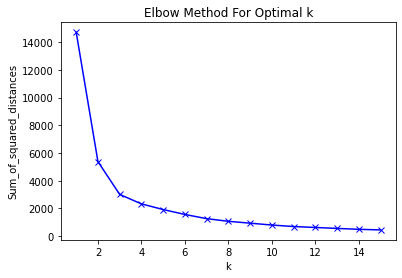

In [21]:
# Visualize different K and models
# save inertia values in a dataframe for k values between 1 to 15
K = 15
cluster_values = list(range(1, K+1))
results = make_list_of_K(K, customers.iloc[:, 3:])
plt.plot(cluster_values, results, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [22]:
# Update K-Means Clustering
# create clustering model with optimal k=4
updated_kmeans_model = KMeans(n_clusters = 4, 
                              init='k-means++', 
                              max_iter=500, 
                              random_state=42)

updated_kmeans_model.fit_predict(customers.iloc[:,3:])

array([1, 0, 3, ..., 0, 3, 0])

In [23]:
# Add cluster centers to the visualization
# create cluster centers and actual data arrays
cluster_centers = updated_kmeans_model.cluster_centers_
actual_data = np.expm1(cluster_centers)
add_points = np.append(actual_data, cluster_centers, axis=1)
add_points

array([[1.01496335e+00, 1.15284613e-03, 7.65510085e+01, 7.00601007e-01,
        1.15218211e-03, 4.35093589e+00],
       [1.52730191e+00, 5.47067357e-04, 1.59911940e+02, 9.27152295e-01,
        5.46917770e-04, 5.08085726e+00],
       [3.95129984e+00, 5.59198198e-04, 5.81869314e+02, 1.59965014e+00,
        5.59041905e-04, 6.36796300e+00],
       [2.40005740e+00, 5.19364987e-04, 2.84126659e+02, 1.22379231e+00,
        5.19230164e-04, 5.65293350e+00]])

In [24]:
# add labels to customers dataframe and add_points array
add_points = np.append(add_points, [[0], [1], [2], [3]], axis=1)
customers["clusters"] = updated_kmeans_model.labels_
# create centers dataframe from add_points
centers_df = pd.DataFrame(data=add_points, columns=["products_ordered",
                                                    "average_return_rate",
                                                    "total_spending",
                                                    "log_products_ordered",
                                                    "log_average_return_rate",
                                                    "log_total_spending",
                                                    "clusters"])
centers_df.head()

,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending,clusters
0,1.014963,0.001153,76.551009,0.700601,0.001152,4.350936,0.0
1,1.527302,0.000547,159.911940,0.927152,0.000547,5.080857,1.0
2,3.951300,0.000559,581.869314,1.599650,0.000559,6.367963,2.0
3,2.400057,0.000519,284.126659,1.223792,0.000519,5.652933,3.0


In [25]:
# align cluster centers of centers_df and customers
centers_df["clusters"] = centers_df["clusters"].astype("int")
centers_df.head()

,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending,clusters
0,1.014963,0.001153,76.551009,0.700601,0.001152,4.350936,0
1,1.527302,0.000547,159.911940,0.927152,0.000547,5.080857,1
2,3.951300,0.000559,581.869314,1.599650,0.000559,6.367963,2
3,2.400057,0.000519,284.126659,1.223792,0.000519,5.652933,3


In [26]:
customers.head()

,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending,clusters
0,1,0.0,260.0,0.693147,0.0,5.564520,1
1,1,0.0,79.2,0.693147,0.0,4.384524,0
2,3,0.0,234.2,1.386294,0.0,5.460436,3
3,1,0.0,89.0,0.693147,0.0,4.499810,0
4,2,0.0,103.0,1.098612,0.0,4.644391,1


In [27]:
# differentiate between data points and cluster centers
customers["is_center"] = 0
centers_df["is_center"] = 1

# add dataframes together
customers = customers.append(centers_df, ignore_index=True)
customers.tail()

,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending,clusters,is_center
24873,1.000000,0.000000,64.000000,0.693147,0.000000,4.174387,0,0
24874,1.014963,0.001153,76.551009,0.700601,0.001152,4.350936,0,1
24875,1.527302,0.000547,159.911940,0.927152,0.000547,5.080857,1,1
24876,3.951300,0.000559,581.869314,1.599650,0.000559,6.367963,2,1
24877,2.400057,0.000519,284.126659,1.223792,0.000519,5.652933,3,1


In [28]:
# add clusters to the dataframe
customers["cluster_name"] = customers["clusters"].astype(str)

In [29]:
# Check for Cluster Magnitude
# values for log_transformation
cardinality_df = pd.DataFrame(
    customers.cluster_name.value_counts().reset_index())

cardinality_df.rename(columns={"index": "Customer Groups",
                               "cluster_name": "Customer Group Magnitude"},
                      inplace=True)
cardinality_df

,Customer Groups,Customer Group Magnitude
0,0,10468
1,1,7236
2,3,5100
3,2,2074
